In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [18]:
homes_train = pd.read_csv('train.csv')

In [25]:
print(homes_train.shape)
homes_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
mask = homes_train.isna().any(axis = 0)
cols_with_missing = np.array(homes_train.columns)[mask]

homes_train[cols_with_missing].isna().sum(axis = 0) #which columns have missing values and how many missing values they have

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [21]:
# A simple example

homes_test = pd.read_csv('test.csv')

In [26]:
print(homes_test.shape)
homes_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
sqft = homes_train[['1stFlrSF']].copy()
price = homes_train['SalePrice'].copy()

In [28]:
linear = LinearRegression()

In [37]:
linear.fit(sqft, np.log(price))

LinearRegression()

In [38]:
linear.score(sqft, np.log(price)) #fairly low correlation

0.3563863681303332

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

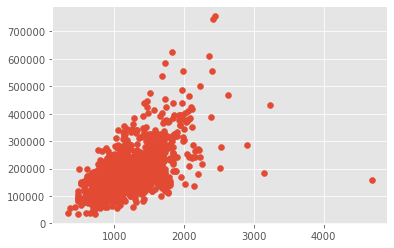

In [41]:
plt.scatter(x = sqft, y = price)

In [47]:
just_area = homes_train[['1stFlrSF', 'SalePrice']].copy()
SFmean = just_area['1stFlrSF'].mean()
SFsd = just_area['1stFlrSF'].std()
pricemean = just_area['SalePrice'].mean()
pricesd = just_area['SalePrice'].std()
print(SFmean, SFsd, pricemean, pricesd)

mask1 = np.abs(just_area['1stFlrSF'] - SFmean) / SFsd < 3 #remove outliers
mask2 = np.abs(just_area['SalePrice'] - pricemean) / pricesd < 3 #remove outliers
just_area_no_outliers = just_area.loc[mask1 & mask2]
just_area_no_outliers.shape

1162.626712328767 386.5877380410738 180921.19589041095 79442.50288288663


(1432, 2)

In [48]:
X = just_area_no_outliers[['1stFlrSF']]
Y = just_area_no_outliers['SalePrice']
linear.fit(X, np.log(Y))
linear.score(X, np.log(Y))

0.3430428446213011

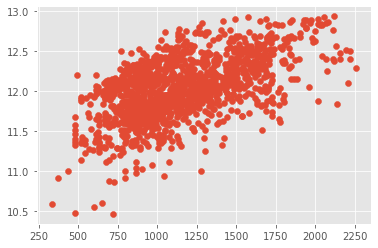

In [49]:
plt.scatter(x = X, y = np.log(Y))

In [55]:
more = homes[['1stFlrSF', 'FullBath', 'BedroomAbvGr', 'SalePrice']].copy()

In [57]:
X = more[['1stFlrSF', 'FullBath', 'BedroomAbvGr']]
Y = more['SalePrice']
linear.fit(X, np.log(Y))
linear.score(X, np.log(Y))

0.5143636731766428

In [62]:
ridge = Ridge(normalize = True, alpha = 1)
ridge.fit(X, np.log(Y))
ridge.score(X, np.log(Y))

0.4249214429173339

In [75]:
lasso = Lasso(normalize = True, alpha = .0001)
lasso.fit(X, np.log(Y))
lasso.score(X, np.log(Y))

0.5142249642243597

In [76]:
homes = pd.read_csv('train.csv')

In [77]:
homes.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

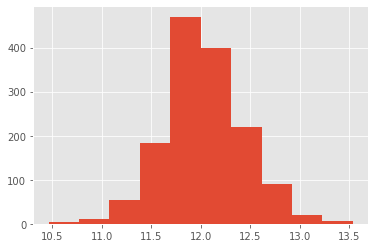

In [200]:
plt.hist(homes.SalePrice.apply(lambda x: np.log(x)))

In [86]:
homes.SalePrice.apply(lambda x: x**(1/6)).median()

7.39091034398429

In [96]:
X = 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [206]:
X = homes.copy().drop('SalePrice', axis = 1)
Y = homes.copy()['SalePrice']
X = pd.get_dummies(X, drop_first = True)
mask = X.isna().any(axis = 0)
X = X.loc[:, ~mask]

In [147]:
np.random.seed(0)
nrows = X.shape[0]
train = np.random.choice(range(nrows), round(nrows*0.8), replace = False)
X_train = X.loc[train]

In [148]:
sum(test)

801

In [150]:
test = pd.Series(range(nrows)).isin(train)
X_test = X.loc[~test]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,12,60,11924,9,5,2005,2006,998,0,177,...,0,0,1,0,0,0,0,0,0,1
23,24,120,4224,5,7,1976,1976,840,0,200,...,0,0,0,0,1,0,0,0,1,0
24,25,20,8246,5,8,1968,2001,188,668,204,...,0,0,0,0,1,0,0,0,1,0
25,26,20,14230,8,5,2007,2007,0,0,1566,...,0,0,0,0,1,0,0,0,1,0
28,29,20,16321,5,6,1957,1997,1277,0,207,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,20,10721,6,6,1959,1959,0,0,1252,...,0,0,0,0,1,0,0,0,1,0
1435,1436,20,8400,6,9,1962,2005,0,0,1319,...,0,0,0,0,0,0,0,0,0,0
1438,1439,20,7407,6,7,1957,1996,600,0,312,...,0,0,0,0,1,0,0,0,1,0
1446,1447,20,26142,5,7,1962,1962,593,0,595,...,0,0,0,0,1,0,0,0,1,0


In [151]:
Y_train = Y[train]
Y_test = Y[~test]

In [173]:
ridge = Ridge()
RSSvalues = []
for alpha in np.arange(1e3)*0.05:
    ridge.set_params(alpha = alpha, normalize = True)
    ridge.fit(X_train, Y_train)
    predY = ridge.predict(X_test)
    RSS_ = ((predY - Y_test)**2).sum()
    RSSvalues.append(RSS_)

In [174]:
RSSvalues.index(min(RSSvalues))*.05
#use alpha = .25

0.25

In [182]:
ridge = Ridge()
ridge.set_params(alpha = 0.25, normalize = True)
ridge.fit(X_train, Y_train)
predY = ridge.predict(X_test)
pd.concat([X_test, pd.DataFrame(predY)], axis = 1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381207.779559
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148125.407758
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163196.500056
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256939.874318
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203795.198704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426.0,20.0,10721.0,6.0,6.0,1959.0,1959.0,0.0,0.0,1252.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
1435,1436.0,20.0,8400.0,6.0,9.0,1962.0,2005.0,0.0,0.0,1319.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1438,1439.0,20.0,7407.0,6.0,7.0,1957.0,1996.0,600.0,0.0,312.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
1446,1447.0,20.0,26142.0,5.0,7.0,1962.0,1962.0,593.0,0.0,595.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN


In [195]:
pred_train = ridge.predict(X_train)
((pred_train - np.array(Y_train))**2).mean()

670841521.9979719

In [198]:
pred_test = ridge.predict(X_test)
((pred_test - np.array(Y_test))**2).mean()

564231264.7821672

In [155]:
np.arange(1e2)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [199]:
pred_train - np.array(Y_train)

array([52909.16736256, 11403.45384808,  -722.80443312, ...,
       -2927.48426128, -1274.63482874, 22927.24855635])

In [201]:
from sklearn import tree

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [347]:
alphas = np.linspace(.0001, 1.0001, 2001)

In [348]:
lasso = Lasso()
lasso.set_params(normalize = True)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(X, np.log(Y))
    coefs_lasso.append(lasso.coef_)
    
lasso_coef_df = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
lasso_coef_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0.0001,-0.0,-0.000224,1.267665e-06,0.066807,0.033389,0.001366,0.000813,0.000005,0.0,-0.0,...,-0.0,0.0,0.078699,0.0,-0.0,0.0,0.0,-0.0,0.035033,0.0
0.0006,-0.0,-0.000000,4.762139e-07,0.095016,0.010157,0.000994,0.001471,0.000018,0.0,-0.0,...,-0.0,-0.0,0.000000,0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0
0.0011,-0.0,-0.000000,0.000000e+00,0.101092,0.000000,0.000781,0.001355,0.000018,0.0,-0.0,...,-0.0,-0.0,0.000000,0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0
0.0016,-0.0,-0.000000,0.000000e+00,0.104434,0.000000,0.000767,0.000819,0.000000,0.0,-0.0,...,-0.0,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0
0.0021,-0.0,-0.000000,0.000000e+00,0.108564,0.000000,0.000554,0.000307,0.000000,0.0,0.0,...,-0.0,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9981,-0.0,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.9986,-0.0,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.9991,-0.0,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.9996,-0.0,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,-0.0,0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0


(0.0, 0.01)

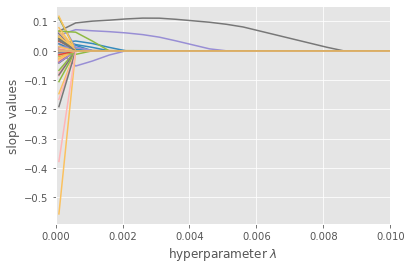

In [349]:
for name in lasso_coef_df.columns:
    plt.plot(lasso_coef_df.index, lasso_coef_df[name])
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xlim(0,.01)

In [357]:
vanishing_points = pd.Series([])
for name in lasso_coef_df.columns:
    reaches_zero = lasso_coef_df[name] == 0
    if sum(reaches_zero) > 0:
        vanishing_point = reaches_zero[reaches_zero == True].index[0]
        vanishing_points[name] = vanishing_point
    else:
        vanishing_points[name] = 100

<ipython-input-357-fcf74b8bca48>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vanishing_points = pd.Series([])


In [360]:
van_pts_desc = vanishing_points.sort_values(ascending = False)
van_pts_desc[van_pts_desc > .001]

OverallQual             0.0086
GrLivArea               0.0056
GarageCars              0.0051
TotalBsmtSF             0.0036
YearBuilt               0.0031
YearRemodAdd            0.0026
1stFlrSF                0.0026
Fireplaces              0.0021
GarageArea              0.0021
CentralAir_Y            0.0016
BsmtFinSF1              0.0016
GarageType_Attchd       0.0016
MSZoning_RL             0.0016
WoodDeckSF              0.0011
BsmtFinType1_GLQ        0.0011
BsmtFullBath            0.0011
BsmtFinType1_Unf        0.0011
KitchenQual_TA          0.0011
Neighborhood_NridgHt    0.0011
BsmtExposure_Gd         0.0011
OverallCond             0.0011
Neighborhood_Crawfor    0.0011
LotArea                 0.0011
dtype: float64

In [356]:
homes['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [252]:
homes['GarageCars'].unique()

array([2, 3, 1, 0, 4])

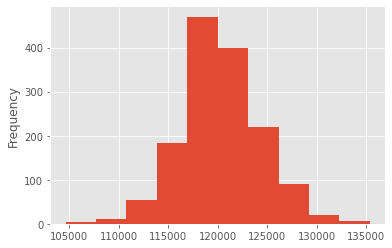

In [268]:
(10000*np.log(Y)).plot(kind = 'hist')

In [285]:
homes.isna().any(axis = 'index')

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [287]:
homes.columns[homes.isna().any(axis = 'index')]

#columns with missing values:
#LotFrontage

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

## COLUMNS WITH MISSING VALUES:

- LotFrontage:
    - Linear feet of street connected to property
    - Values between 21 and 313, with 259 missing

- Alley:
    - Type of alley access
    - Values: Grvl (gravel), Pave (paved), with 1369 missing
    


In [294]:
np.sort(homes.LotFrontage.unique())

array([ 21.,  24.,  30.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.,
       106., 107., 108., 109., 110., 111., 112., 114., 115., 116., 118.,
       120., 121., 122., 124., 128., 129., 130., 134., 137., 138., 140.,
       141., 144., 149., 150., 152., 153., 160., 168., 174., 182., 313.,
        nan])

In [308]:
num_missing = homes.isna().sum(axis = 'index')
num_missing[num_missing > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [329]:
missing_dict = {}
for name in homes.columns:
    if homes[name].isna().sum() > 0:
        num_miss = homes[name].isna().sum()
        if homes[name].dtype == 'object':
            mask = ~homes[name].isna()
            values = homes[name][mask].unique().tolist()
            lst = [values, str(num_miss) + ' missing values']
        else:
            min_ = homes[name].min()
            max_ = homes[name].max()
            values = ['min: ' + str(min_), 'max: ' + str(max_)]
            lst = [values, str(num_miss) + ' missing values']
        missing_dict[name] = lst

for item in missing_dict.items():
    print(item[0] + ':\nValues:', item[1][0], '\n', item[1][1], '\n' + '-'*80)

LotFrontage:
Values: ['min: 21.0', 'max: 313.0'] 
 259 missing values 
--------------------------------------------------------------------------------
Alley:
Values: ['Grvl', 'Pave'] 
 1369 missing values 
--------------------------------------------------------------------------------
MasVnrType:
Values: ['BrkFace', 'None', 'Stone', 'BrkCmn'] 
 8 missing values 
--------------------------------------------------------------------------------
MasVnrArea:
Values: ['min: 0.0', 'max: 1600.0'] 
 8 missing values 
--------------------------------------------------------------------------------
BsmtQual:
Values: ['Gd', 'TA', 'Ex', 'Fa'] 
 37 missing values 
--------------------------------------------------------------------------------
BsmtCond:
Values: ['TA', 'Gd', 'Fa', 'Po'] 
 37 missing values 
--------------------------------------------------------------------------------
BsmtExposure:
Values: ['No', 'Gd', 'Mn', 'Av'] 
 38 missing values 
---------------------------------------------

## Ideas for imputation/dealing with missing data:


### Features to delete:

- Alley
- PoolQC (and maybe also PoolArea along with it)
- MiscFeatures
- GarageYrBlt
- Fence


### Features to impute:

- LotFrontage: with knn
- Electrical: with mode
- BsmtExposure: with knn
- MasVnrType: with knn
- MasVnrArea: with knn
- GarageType: with 0, then dummify


### Features that could possibly be ranked/quantified, imputing NA with 0:

- BsmtQual (qual)
- BsmtCond (qual)
- BsmtFinType1 (bsmt fin)
- BsmtFinType2 (bsmt fin)
- FireplaceQu (qual)
- GarageFinish (grg fin)
- GarageQual (qual)
- GarageCond (qual)

### Key for quality variables:

- Ex:	Excellent

- Gd:	Good

- TA:	Typical/Average

- Fa:	Fair

- Po:	Poor



### Key for basement finish variables:

- GLQ: good quality living quarters

- ALQ: average quality living quarters

- Unf: unfinished

- Rec: average quality rec room

- BLQ: below average living quarters

- LwQ: low quality



### Key for garage finish variables:

- Fin: Finished

- RFn: Rough Finished

- Unf: Unfinished


### Key for garage types:

- Attchd

- Detchd

- BuiltIn

- CarPort

- Basment

- 2Types

In [362]:
homes['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [364]:
homes['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [367]:
homes['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [368]:
homes[['MasVnrType', 'MasVnrArea']][homes['MasVnrType'].isna()]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [387]:
# qv = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po': 1}
# def qual_rank(x):
#     if x in qv.keys():
#         return qv[x]
#     else:
#         return 0
    
# bfv = {'GLQ': 5, 'ALQ': 4, 'Unf': 1, 'Rec':4 , 'BLQ': 3, 'LwQ': 2}
# def bsmt_fin_rank(x):
#     if x in bfv.keys():
#         return bfv[x]
#     else:
#         return 0
    
# gfv = {'RFn': 2, 'Unf': 1, 'Fin': 3}
# def grg_fin_rank(x):
#     if x in gfv.keys():
#         return gfv[x]
#     else:
#         return 0

In [444]:
homes2 = homes.copy()

In [389]:
# qual = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
# bsmt_fin = ['BsmtFinType1', 'BsmtFinType2']

# for name in qual:
#     homes2[name] = homes2[name].apply(qual_rank)

# for name in bsmt_fin:
#     homes2[name] = homes2[name].apply(bsmt_fin_rank)
    
# homes2['GarageFinish'] = homes2['GarageFinish'].apply(grg_fin_rank)

In [445]:
missing_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu',
           'GarageQual', 'GarageCond', 'BsmtFinType1',
           'BsmtFinType2', 'GarageFinish', 'GarageType',
           'BsmtExposure']

for name in missing_cols:
    homes2[name] = homes2[name].fillna('None')

In [446]:
homes2 = homes2.drop(['Alley', 'PoolArea', 'PoolQC', 'MiscFeature', 'GarageYrBlt', 'Fence'], axis = 1)

In [447]:
homes2['Electrical'] = homes2['Electrical'].fillna(homes2['Electrical'].mode()[0])

In [ ]:
pd.get_dummies

In [395]:
from sklearn.impute import KNNImputer

In [411]:
imputer = KNNImputer(n_neighbors = 9, copy = False)

In [412]:
imputer.fit_transform(homes2)


#- LotFrontage: with knn
#- BsmtExposure: with knn
#- MasVnrType: with knn
#- MasVnrArea: with knn

ValueError: could not convert string to float: 'RL'

In [451]:
homes2.columns[homes2.isna().any(axis = 0)]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea'], dtype='object')

In [427]:
homes2.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [432]:
testing = homes2.copy().drop('MasVnrType', axis = 1)
imputer.fit_transform(testing)

ValueError: could not convert string to float: 'RL'

In [438]:
homes2 = homes2[~homes2['MasVnrType'].isna()]

In [435]:
homes2['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [457]:
homes2.to_csv('homes2.csv')

In [459]:
homes_imputed = pd.read_csv('homes_imputed.csv')

In [462]:
homes_imputed.drop(['Unnamed: 0', 'X', 'Id'], axis = 1, inplace = True)

In [463]:
homes_imputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,8,2007,WD,Normal,12.072541
1456,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,12.254863
1457,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,2500,5,2010,WD,Normal,12.493130
1458,20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,4,2010,WD,Normal,11.864462


In [468]:
homes_dummified = pd.get_dummies(homes_imputed, drop_first = True)

In [474]:
X = homes_dummified.copy().drop('SalePrice', axis = 1)
Y = homes_dummified.copy()['SalePrice']

(0.0, 1.0)

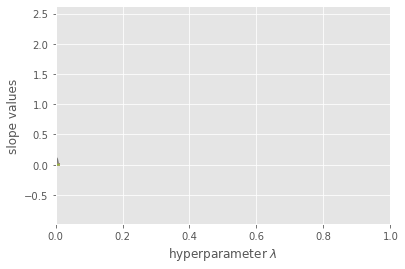

In [483]:
alphas = np.linspace(0.00001, .01001, 101)

lasso = Lasso()
lasso.set_params(normalize = True)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(X, Y)
    coefs_lasso.append(lasso.coef_)
    
lasso_coef_df = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)

for name in lasso_coef_df.columns:
    plt.plot(lasso_coef_df.index, lasso_coef_df[name])
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xlim(0,1)

In [482]:
lasso_coef_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0.0001,-0.000322,-0.0,0.000001,0.067551,0.032754,0.001241,0.000827,0.0,0.000000,0.0,...,-0.0,0.0,0.07842,0.0,-0.0,0.0,-0.0,-0.0,0.035747,0.0
0.0011,-0.000000,0.0,0.000000,0.100876,0.000000,0.000772,0.001355,0.0,0.000019,0.0,...,-0.0,-0.0,0.00000,0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0
0.0021,-0.000000,0.0,0.000000,0.108564,0.000000,0.000554,0.000307,0.0,0.000000,0.0,...,-0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0
0.0031,-0.000000,0.0,0.000000,0.111193,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,-0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.0041,-0.000000,0.0,0.000000,0.102300,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.0051,-0.000000,0.0,0.000000,0.090399,-0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.0061,-0.000000,0.0,0.000000,0.067437,-0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.0071,-0.000000,0.0,0.000000,0.039799,-0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.0081,-0.000000,0.0,0.000000,0.012161,-0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0
0.0091,-0.000000,0.0,0.000000,0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,-0.0,0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,0.0


In [484]:
vanishing_points = pd.Series([])
for name in lasso_coef_df.columns:
    reaches_zero = lasso_coef_df[name] == 0
    if sum(reaches_zero) > 0:
        vanishing_point = reaches_zero[reaches_zero == True].index[0]
        vanishing_points[name] = vanishing_point
    else:
        vanishing_points[name] = 100

<ipython-input-484-fcf74b8bca48>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vanishing_points = pd.Series([])


In [494]:
vanishing_points[vanishing_points > .0005].sort_values(ascending = False)

OverallQual             0.00861
GrLivArea               0.00561
GarageCars              0.00491
TotalBsmtSF             0.00341
YearBuilt               0.00291
YearRemodAdd            0.00251
Fireplaces              0.00201
GarageArea              0.00181
FireplaceQu_None        0.00181
CentralAir_Y            0.00161
MSZoning_RL             0.00151
GarageType_Attchd       0.00121
BsmtFullBath            0.00111
KitchenQual_TA          0.00101
LotArea                 0.00091
WoodDeckSF              0.00091
OverallCond             0.00081
BsmtExposure_Gd         0.00081
BsmtFinType1_GLQ        0.00081
Neighborhood_Crawfor    0.00071
Neighborhood_NridgHt    0.00071
BsmtFinType1_Unf        0.00071
SaleType_New            0.00061
MSSubClass              0.00061
Condition1_Norm         0.00061
Condition2_PosN         0.00061
BldgType_Twnhs          0.00061
Foundation_PConc        0.00061
ScreenPorch             0.00051
TotRmsAbvGrd            0.00051
FullBath                0.00051
PavedDri

In [497]:
(homes['YearBuilt'] - homes['GarageYrBlt']).value_counts()

 0.0     1089
-1.0       52
-2.0       16
-3.0       10
-8.0        7
         ... 
-42.0       1
 2.0        1
-89.0       1
-44.0       1
-74.0       1
Length: 88, dtype: int64